### Practice Notebook

Super Deadly dont touch

By Manu Patil

In [15]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [24]:
def make_system(Gamma, mu, tau, beta, rho, alpha, sigma, delta, pi):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R = 1000, L = 1, E = 1, V = 100);

    t0 = 0
    t_end = 7000
    
    return System(init=init, t0=t0, t_end=t_end,Gamma = Gamma, 
                  mu = mu, 
                  tau = tau, 
                  beta = beta, 
                  rho = rho, 
                  alpha = alpha, 
                  sigma = sigma, 
                  delta = delta, 
                  pi = pi)

In [28]:
def update_func(state, t, system):
    unpack(system)
    r,l,e,v = state;
    dR = r + r * (Gamma * tau - mu * state.R - beta * state.R * state.V)
    dL = l + l * (rho * beta * state.R * state.V - mu * state.L - alpha * state.L)
    dE = e + e * ((1 - rho)*beta*state.R*state.V + alpha*state.L + delta*state.E)
    dV = v + v * (pi*state.E - sigma *state.V)
    #print(rho * beta * state.R * state.V)
    return State(R = dR,L = dL,E = dE,V = dV);

In [29]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

                 R             L             E             V
0             1000             1             1           100
1           -27088       3.66264        25.666         -9900
2      1.96031e+09         26523   1.67279e+06  -2.21439e+08
3      2.29756e+23   -3.1086e+17  -1.76452e+20  -1.35113e+17
4      1.92572e+60    2.6055e+53   1.33105e+57   2.38405e+39
5    -2.38707e+156  3.22971e+148  1.48494e+153   3.17329e+98
6             -inf          -inf          -inf  4.71216e+253
7             -inf           NaN           NaN          -inf
8              NaN           NaN           NaN           NaN
9              NaN           NaN           NaN           NaN
10             NaN           NaN           NaN           NaN
11             NaN           NaN           NaN           NaN
12             NaN           NaN           NaN           NaN
13             NaN           NaN           NaN           NaN
14             NaN           NaN           NaN           NaN
15             NaN      

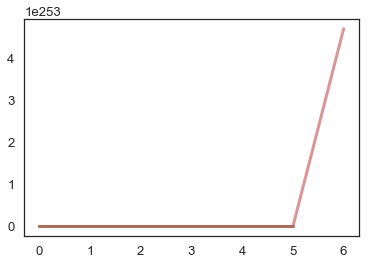

In [30]:
system = make_system(1.36, .00136, .2, .00027, .1, .036 , 2, .33, 100)
frame = run_simulation(system, update_func);
print(frame)
plot(frame.R);
plot(frame.L);
plot(frame.E);
plot(frame.V);